In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [59]:
class Ema:
    def __init__(self, alpha = 1):
        self.alpha = alpha
    
    def calculate_alpha(self, period):
        return 2 /(period + 1)
    
    def calculate_ema(self, row):
        ema_arr = []
        smoothing = self.alpha
        period = int(2 / smoothing - 1)
        mean = sum(row[0 : period]) / period
        for i in range(period + 1, len(row)):
            mean = mean + smoothing * (row[i] - mean)
            ema_arr.append(mean)
        return (ema_arr)
    
    def fit_predict(self, df, points):
        data = df
        smoothing = self.alpha
        period = int(2 / smoothing - 1)
        for x in range(points):
            forecast_arr = []
            for i in range(len(data)):
                mean = 0
                tmp = []
                mean = sum(data.iloc[i, :period]) / period
                for j in range(period + 1, len(data.iloc[0, :])):
                    mean = mean + smoothing * (data.iloc[i, j] - mean)
                    tmp.append(mean)
                forecast = smoothing * data.iloc[i, len(data.columns) - 1] + (1 - smoothing) * tmp[-1]
                forecast_arr.append(forecast)
            data[x] = forecast_arr
        prediction = data.iloc[:,  -points:]
        df.drop(df.iloc[:, -points:], axis = 1, inplace = True)
        return prediction


In [60]:
def autocorr_check(data):
    autocorr_index = []
    for i in range(len(data)):
        arr = sm.tsa.acf(data.iloc[i, 1:])
        for j in range(1, len(arr)):
            if abs(arr[j]) - abs(arr[j - 1]) > 0.5:
                autocorr_index.append(i)
    return autocorr_index

In [61]:
inflow = pd.read_csv('Final predanalysis table - Inflow.csv')
outflow = pd.read_csv('Final predanalysis table - Outflow.csv')

In [62]:
inflow.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,0,0,0,0,0,0,0,0,90,...,253.0,349.0,628.0,823.0,804.0,829.0,789.0,320.0,370.0,300.0
1,Albania,598,699,734,889,1161,1290,1359,1468,1866,...,1421.0,1291.0,1306.0,1312.0,1458.0,1473.0,1466.0,1718.0,1745.0,1970.0
2,Algeria,0,0,0,0,0,170,189,99,104,...,2452.0,1997.0,1989.0,1792.0,1985.0,1786.0,1700.0,1792.0,1659.0,1770.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,21.0,47.0,53.0,0.0,0.0
4,Angola,0,0,0,0,0,0,0,0,82,...,31.0,11.0,4.0,1.0,2.0,3.0,8.0,13.0,14.0,15.0


In [63]:
outflow.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0,0,0,0,0,0,0,0,217,...,445,524,229,168,144,235,217,225,0,0
1,Albania,0,0,0,4,5,7,27,10,280,...,191,179,153,147,106,115,120,125,140,149
2,Algeria,0,0,0,0,0,27,35,49,27,...,39,296,72,77,214,87,82,149,83,60
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,92,84,71,0
4,Angola,266,216,224,230,296,215,413,603,669,...,2396,2747,1253,1176,961,682,549,576,445,518


[] []


/Users/tigran_oganesyan/miniforge3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


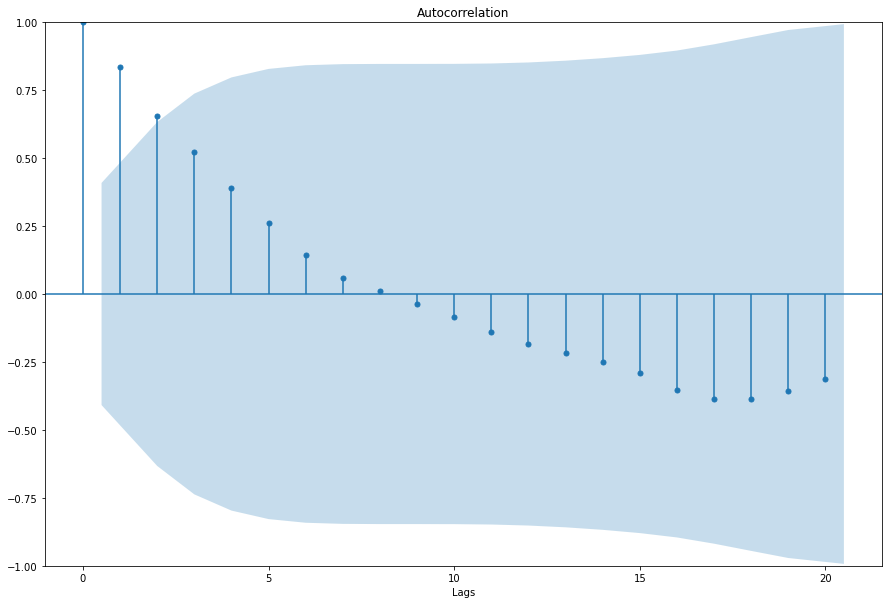

In [64]:
auto_inflow = autocorr_check(inflow)
auto_outflow = autocorr_check(outflow)
print(auto_inflow, auto_outflow)

fig, ax = plt.subplots(figsize=(15, 10))
plot_acf(outflow.iloc[100, 1:], lags = 20, ax=ax)
plt.xlabel('Lags')
plt.show()

In [65]:
model = Ema()
model.alpha = model.calculate_alpha(3)

Text(0.5, 1.0, 'Luxembourg inflow (no predictions)')

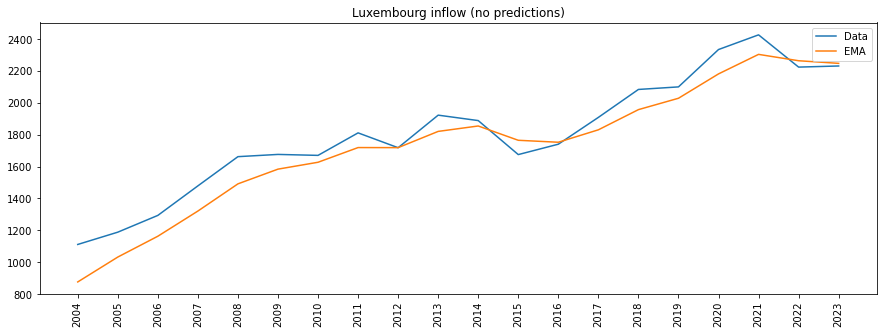

In [66]:
inflow_copy = inflow.drop('Country', axis = 1)
ema_arr = model.calculate_ema(inflow_copy.iloc[100, :])
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
plt.plot(inflow_copy.iloc[100, 4:24])
plt.plot(ema_arr)
plt.legend(['Data', 'EMA'])
plt.title('Luxembourg inflow (no predictions)')

Text(0.5, 1.0, 'Luxembourg outflow (no predictions)')

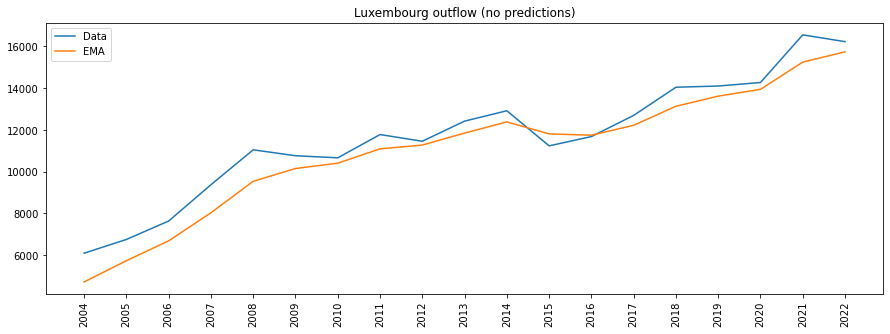

In [67]:
outflow_copy = outflow.drop('Country', axis = 1)
ema_arr = model.calculate_ema(outflow_copy.iloc[100, :])
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
plt.plot(outflow_copy.iloc[100, 4:24])
plt.plot(ema_arr)
plt.legend(['Data', 'EMA'])
plt.title('Luxembourg outflow (no predictions)')

In [68]:
inflow_pred = model.fit_predict(inflow_copy, 2)
outflow_pred = model.fit_predict(outflow_copy, 3)
inflow_copy[['2024', '2025']] = inflow_pred
outflow_copy[['2023', '2024', '2025']] = outflow_pred

Text(0.5, 1.0, 'Luxembourg inflow predicted')

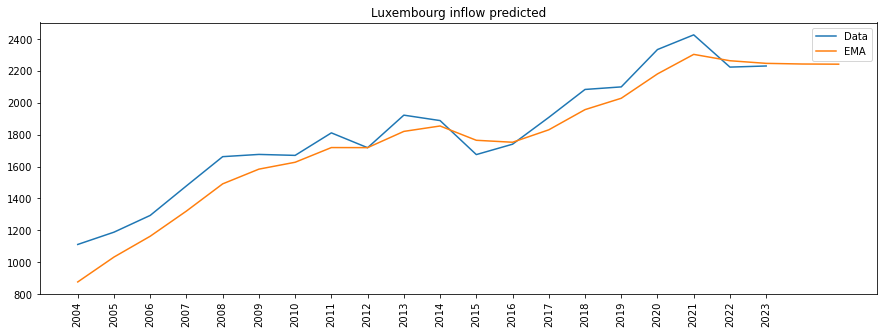

In [69]:
ema_arr = model.calculate_ema(inflow_copy.iloc[100, :])
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
plt.plot(inflow_copy.iloc[100, 4:24])
plt.plot(ema_arr)
plt.legend(['Data', 'EMA'])
plt.title('Luxembourg inflow predicted')

Text(0.5, 1.0, 'Luxembourg outflow predicted')

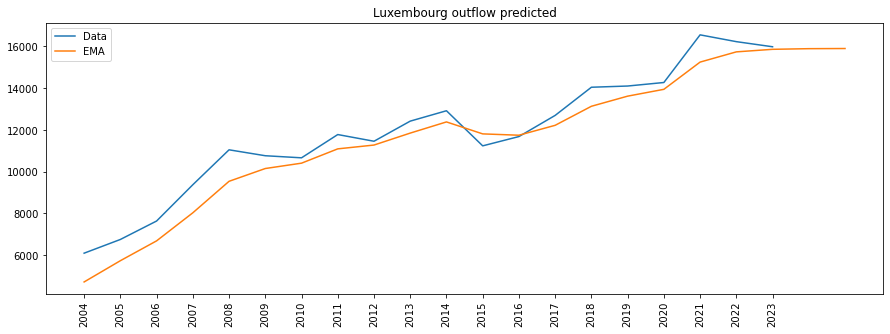

In [70]:
ema_arr = model.calculate_ema(outflow_copy.iloc[100, :])
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 90)
plt.plot(outflow_copy.iloc[100, 4:24])
plt.plot(ema_arr)
plt.legend(['Data', 'EMA'])
plt.title('Luxembourg outflow predicted')

In [71]:
inflow_pred.to_csv('inflow_pred.csv')
outflow_pred.to_csv('outflow_pred.csv')

In [72]:
inflow_pred

,0,1
0,340.183136,350.228920
1,1893.529357,1874.411696
2,1757.546188,1754.432735
3,5.109375,6.386719
4,14.177689,13.972111
...,...,...
189,3769.938119,3769.672649
190,240.004361,237.505451
191,2988.256531,2956.320663
192,653086.223151,649032.778939
